# **LeNet with Fashion MNIST Dataset**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from keras.utils import plot_model

In [27]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.fashion_mnist.load_data()

In [28]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

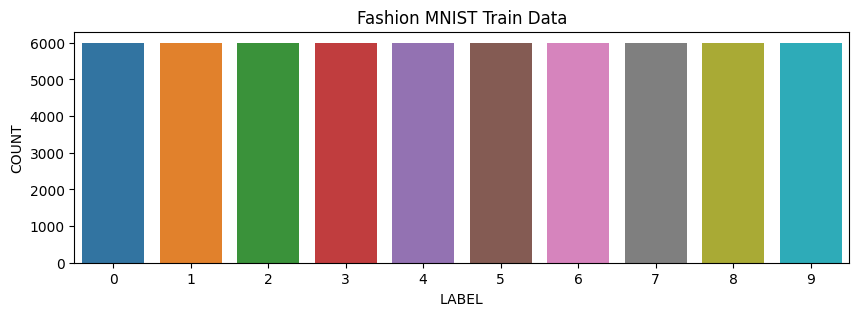

In [29]:
plt.figure(figsize=(10,3))
sns.countplot(x=y_train)
plt.title('Fashion MNIST Train Data')
plt.ylabel('COUNT')
plt.xlabel('LABEL')
plt.show()

In [30]:
# This code normalazation
x_train = x_train / 255.0
x_test = x_test / 255.0

In [31]:
x_train.shape

(60000, 28, 28)

In [32]:
from tensorflow.keras import layers, models
lenet = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(28,28,1), padding='same'), #C1
    keras.layers.AveragePooling2D(), #S1
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'), #C2
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='relu', padding='valid'), #C3
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='relu'), #F1
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [33]:
lenet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 120)              

In [34]:
lenet.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [35]:
hist = lenet.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test),verbose=1)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5860 - accuracy: 0.7829 - val_loss: 0.4561 - val_accuracy: 0.8332
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3944 - accuracy: 0.8536 - val_loss: 0.3853 - val_accuracy: 0.8553
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3415 - accuracy: 0.8730 - val_loss: 0.3421 - val_accuracy: 0.8734
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3082 - accuracy: 0.8845 - val_loss: 0.3350 - val_accuracy: 0.8767
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2833 - accuracy: 0.8950 - val_loss: 0.2993 - val_accuracy: 0.8886
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2622 - accuracy: 0.9011 - val_loss: 0.2961 - val_accuracy: 0.8929
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2464 - accuracy: 0.9078 - val_loss: 0.3000 - val_accuracy

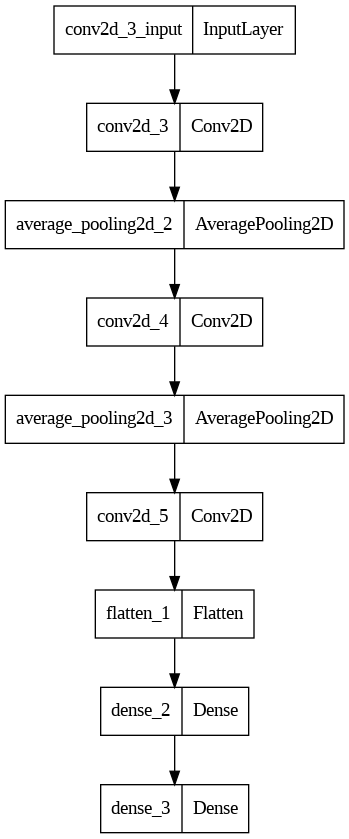

In [36]:
plot_model(lenet)

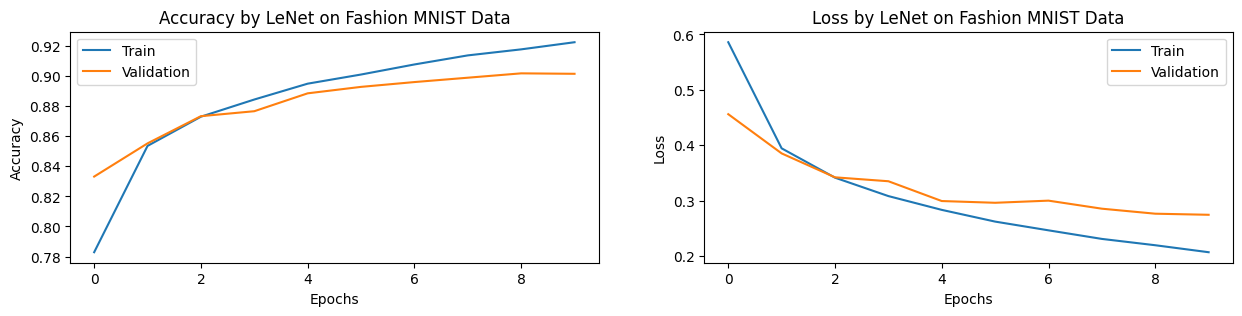

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(15, 3))
plt.subplot(1, 2, 1)
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Accuracy by LeNet on Fashion MNIST Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss by LeNet on Fashion MNIST Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions= lenet.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

confusion_matrix(y_test, y_predictions)

313/313 [==============================] - 1s 2ms/step


array([[865,   0,  11,  19,   5,   1,  91,   0,   8,   0],
       [  0, 978,   0,  14,   1,   0,   6,   0,   1,   0],
       [ 19,   1, 791,  12,  98,   0,  79,   0,   0,   0],
       [ 13,   2,   7, 913,  47,   0,  17,   0,   1,   0],
       [  2,   1,  30,  10, 888,   1,  66,   0,   2,   0],
       [  0,   0,   0,   0,   0, 970,   0,  13,   3,  14],
       [147,   2,  50,  27,  68,   0, 700,   0,   6,   0],
       [  0,   0,   0,   0,   0,  13,   0, 953,   1,  33],
       [  5,   0,   2,   2,   2,   1,   2,   1, 985,   0],
       [  1,   0,   0,   0,   0,   2,   0,  24,   0, 973]])

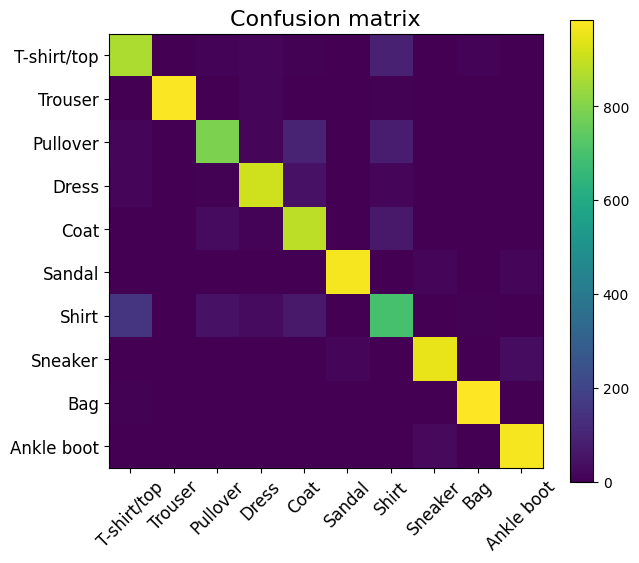

In [39]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [40]:
print("Test accuracy:", accuracy_score(y_test, y_predictions))

Test accuracy: 0.9016


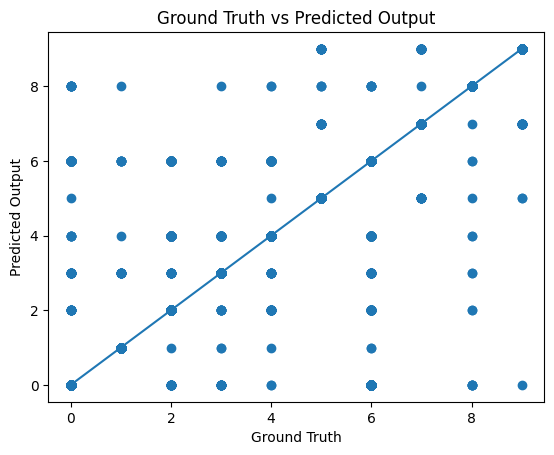

In [41]:
plt.scatter(y_test, y_predictions)
plt.plot(range(10), range(10))
plt.xlabel("Ground Truth")
plt.ylabel("Predicted Output")
plt.title("Ground Truth vs Predicted Output")

plt.show()

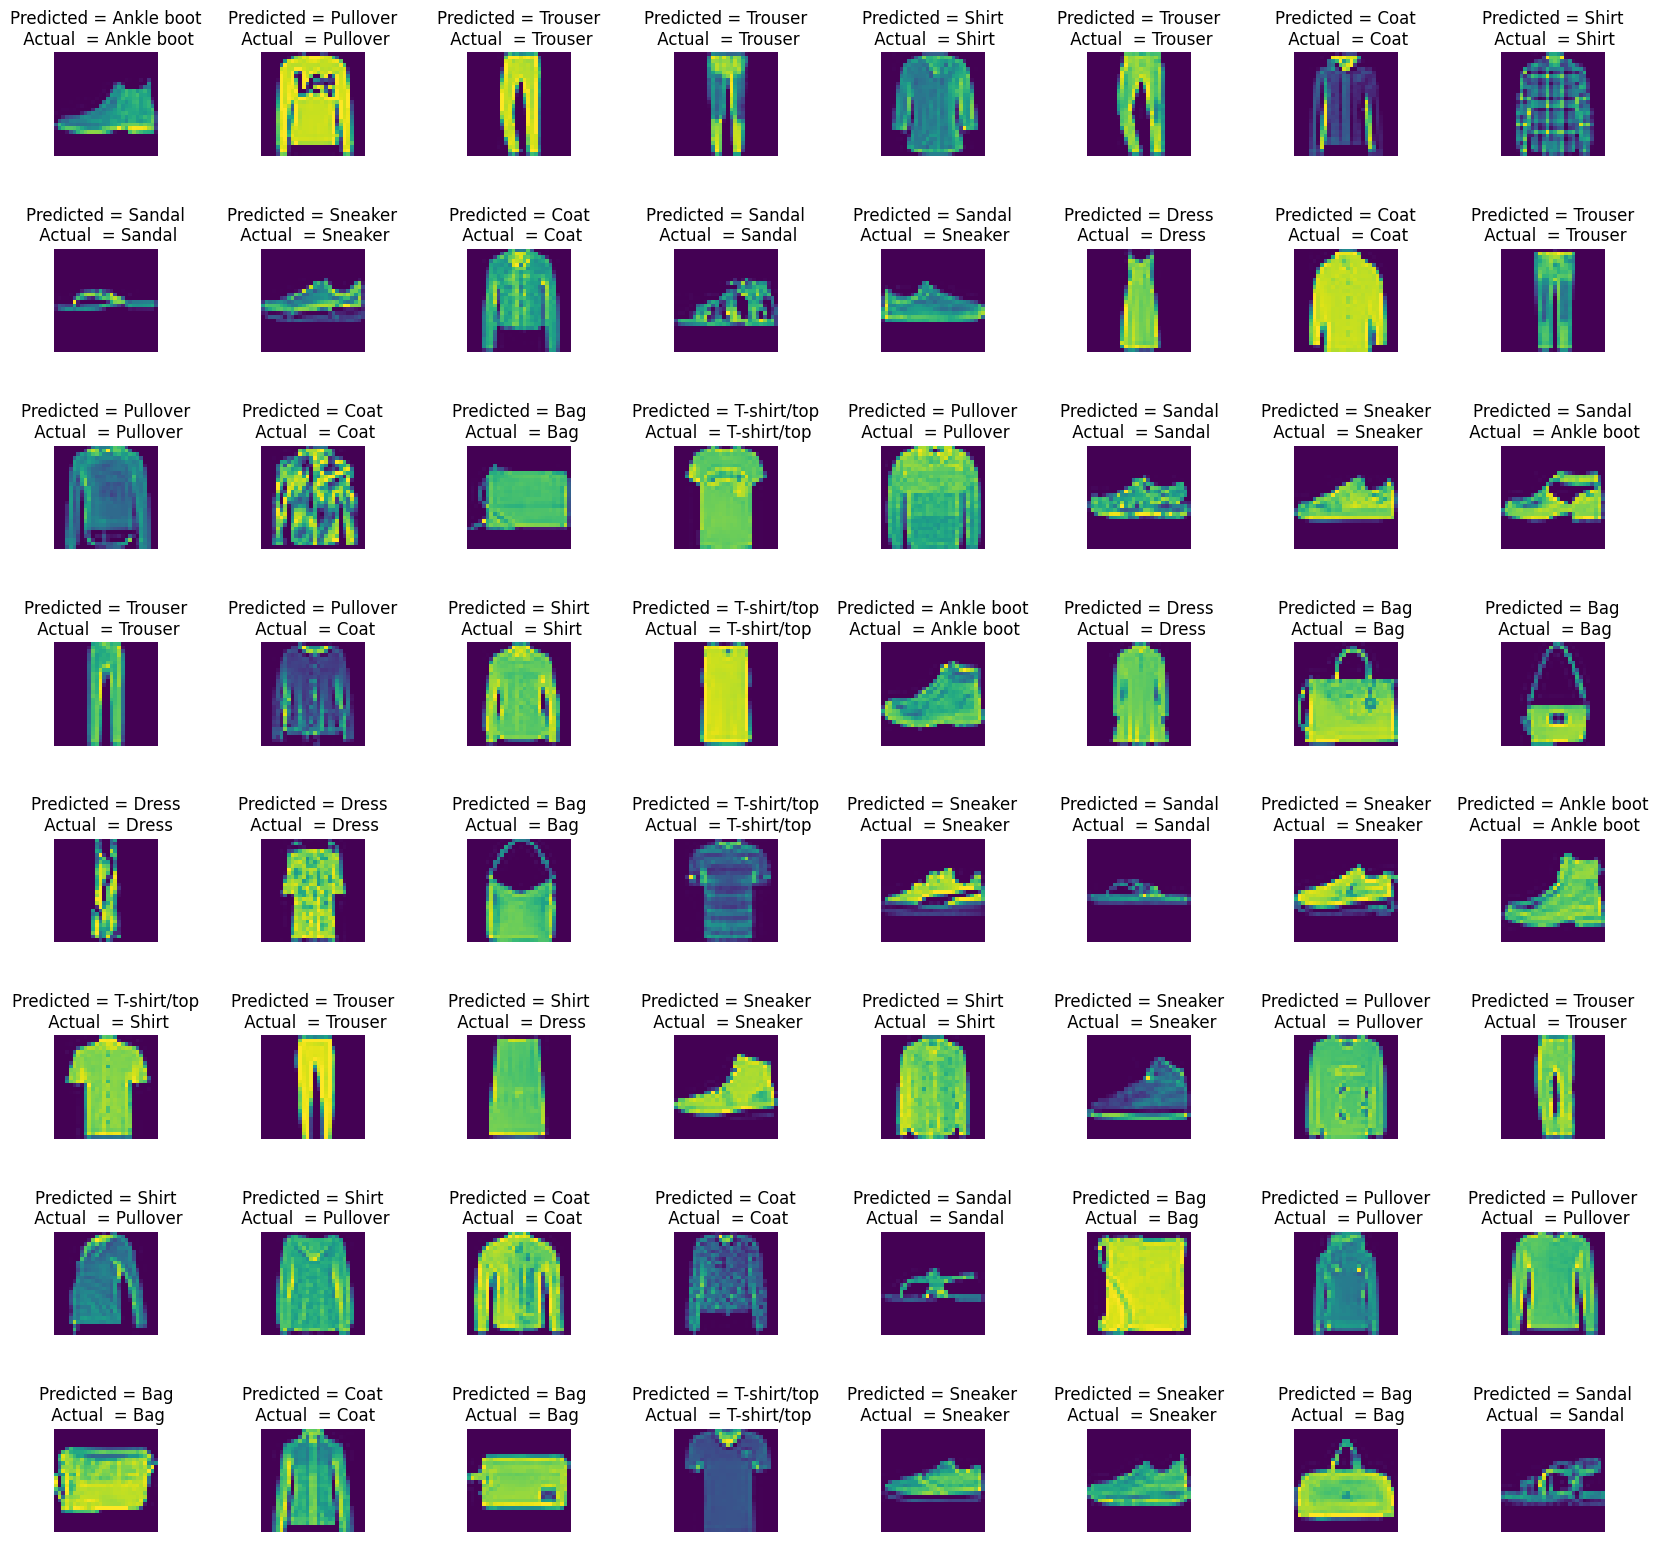

In [42]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

#**AlexNet with Fashion MNIST Dataset**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D

In [44]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.fashion_mnist.load_data()

print(x_train.shape) # (60000, 28, 28)

# train set / data 
x_train = np.expand_dims(x_train, axis=-1)
x_train = tf.image.resize(x_train, [32,32]) # if we want to resize 

x_test = np.expand_dims(x_test, axis=-1)
x_test = tf.image.resize(x_test, [32,32]) # if we want to resize 


(60000, 28, 28)


In [45]:
#Define Alexnet Model
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=16,kernel_size=(3,3),strides=(4,4),input_shape=(32,32,1), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(5,5),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(30,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(20,(3,3),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Flatten())
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(10,activation='softmax'))

AlexNet.compile(optimizer='SGD', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
AlexNet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 8, 8, 16)          160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 16)         0         
 )                                                               
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 60)          24060     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 60)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 2, 2, 60)          32460     
                                                                 
 conv2d_9 (Conv2D)           (None, 2, 2, 30)         

In [46]:
history1 = AlexNet.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test),verbose=1)

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.7202 - accuracy: 0.7319 - val_loss: 0.5364 - val_accuracy: 0.8037
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5012 - accuracy: 0.8162 - val_loss: 0.4814 - val_accuracy: 0.8189
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4445 - accuracy: 0.8349 - val_loss: 0.4460 - val_accuracy: 0.8358
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4086 - accuracy: 0.8481 - val_loss: 0.4172 - val_accuracy: 0.8484
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3830 - accuracy: 0.8584 - val_loss: 0.4303 - val_accuracy: 0.8443
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3610 - accuracy: 0.8656 - val_loss: 0.4342 - val_accuracy: 0.8475
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3460 - accuracy: 0.8688 - val_loss: 0.3974 - val_accu

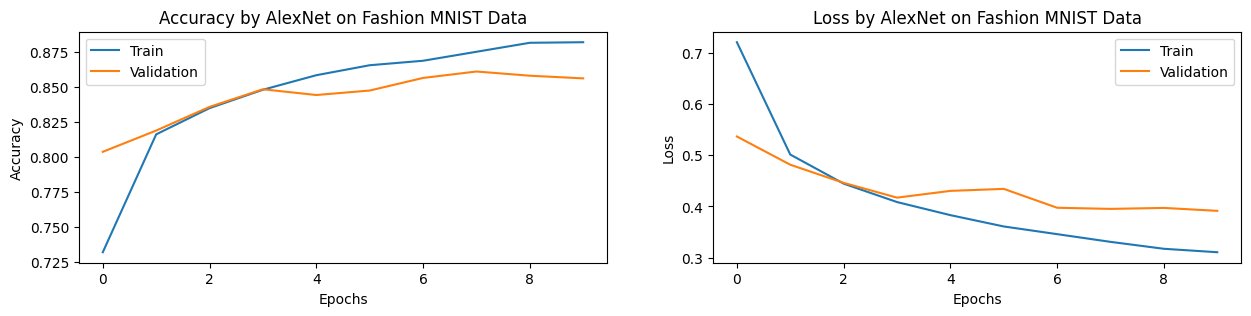

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(15, 3))
plt.subplot(1, 2, 1)
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Accuracy by AlexNet on Fashion MNIST Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss by AlexNet on Fashion MNIST Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_predictions1 = AlexNet.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)

confusion_matrix(y_test, y_predictions1)

313/313 [==============================] - 1s 2ms/step


array([[754,   8,  15,  35,   2,   2, 172,   1,  11,   0],
       [  2, 980,   1,  11,   1,   0,   4,   0,   1,   0],
       [ 13,   1, 756,  12,  97,   1, 118,   0,   2,   0],
       [ 10,  29,  11, 873,  44,   0,  27,   0,   5,   1],
       [  1,   2, 107,  43, 764,   0,  81,   0,   1,   1],
       [  0,   0,   0,   0,   0, 969,   0,  17,   0,  14],
       [ 94,   6,  87,  37, 104,   1, 661,   0,  10,   0],
       [  0,   0,   0,   0,   0,  76,   0, 892,   0,  32],
       [  1,   1,   4,   2,   6,   6,   8,   3, 968,   1],
       [  0,   0,   0,   0,   0,  15,   1,  39,   0, 945]])

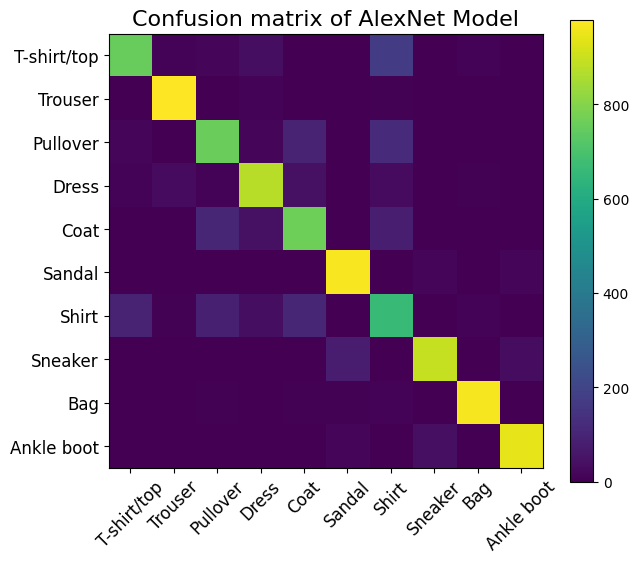

In [59]:
# confusion matrix and accuracy
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix of AlexNet Model', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions1))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [60]:
print("Test accuracy by AlexNet:", accuracy_score(y_test, y_predictions1))

Test accuracy by AlexNet: 0.8562


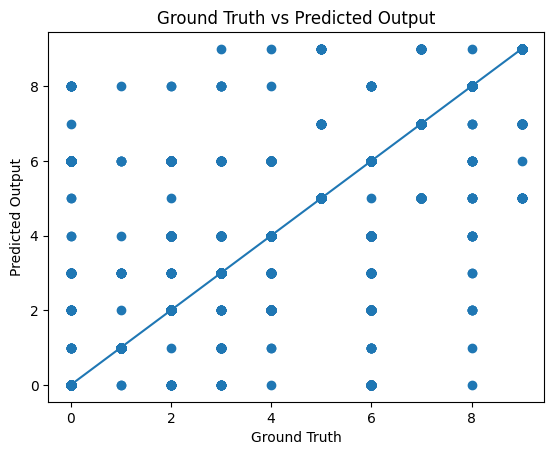

In [80]:
plt.scatter(y_test, y_predictions1)
plt.plot(range(10), range(10))
plt.xlabel("Ground Truth")
plt.ylabel("Predicted Output")
plt.title("Ground Truth vs Predicted Output")

plt.show()

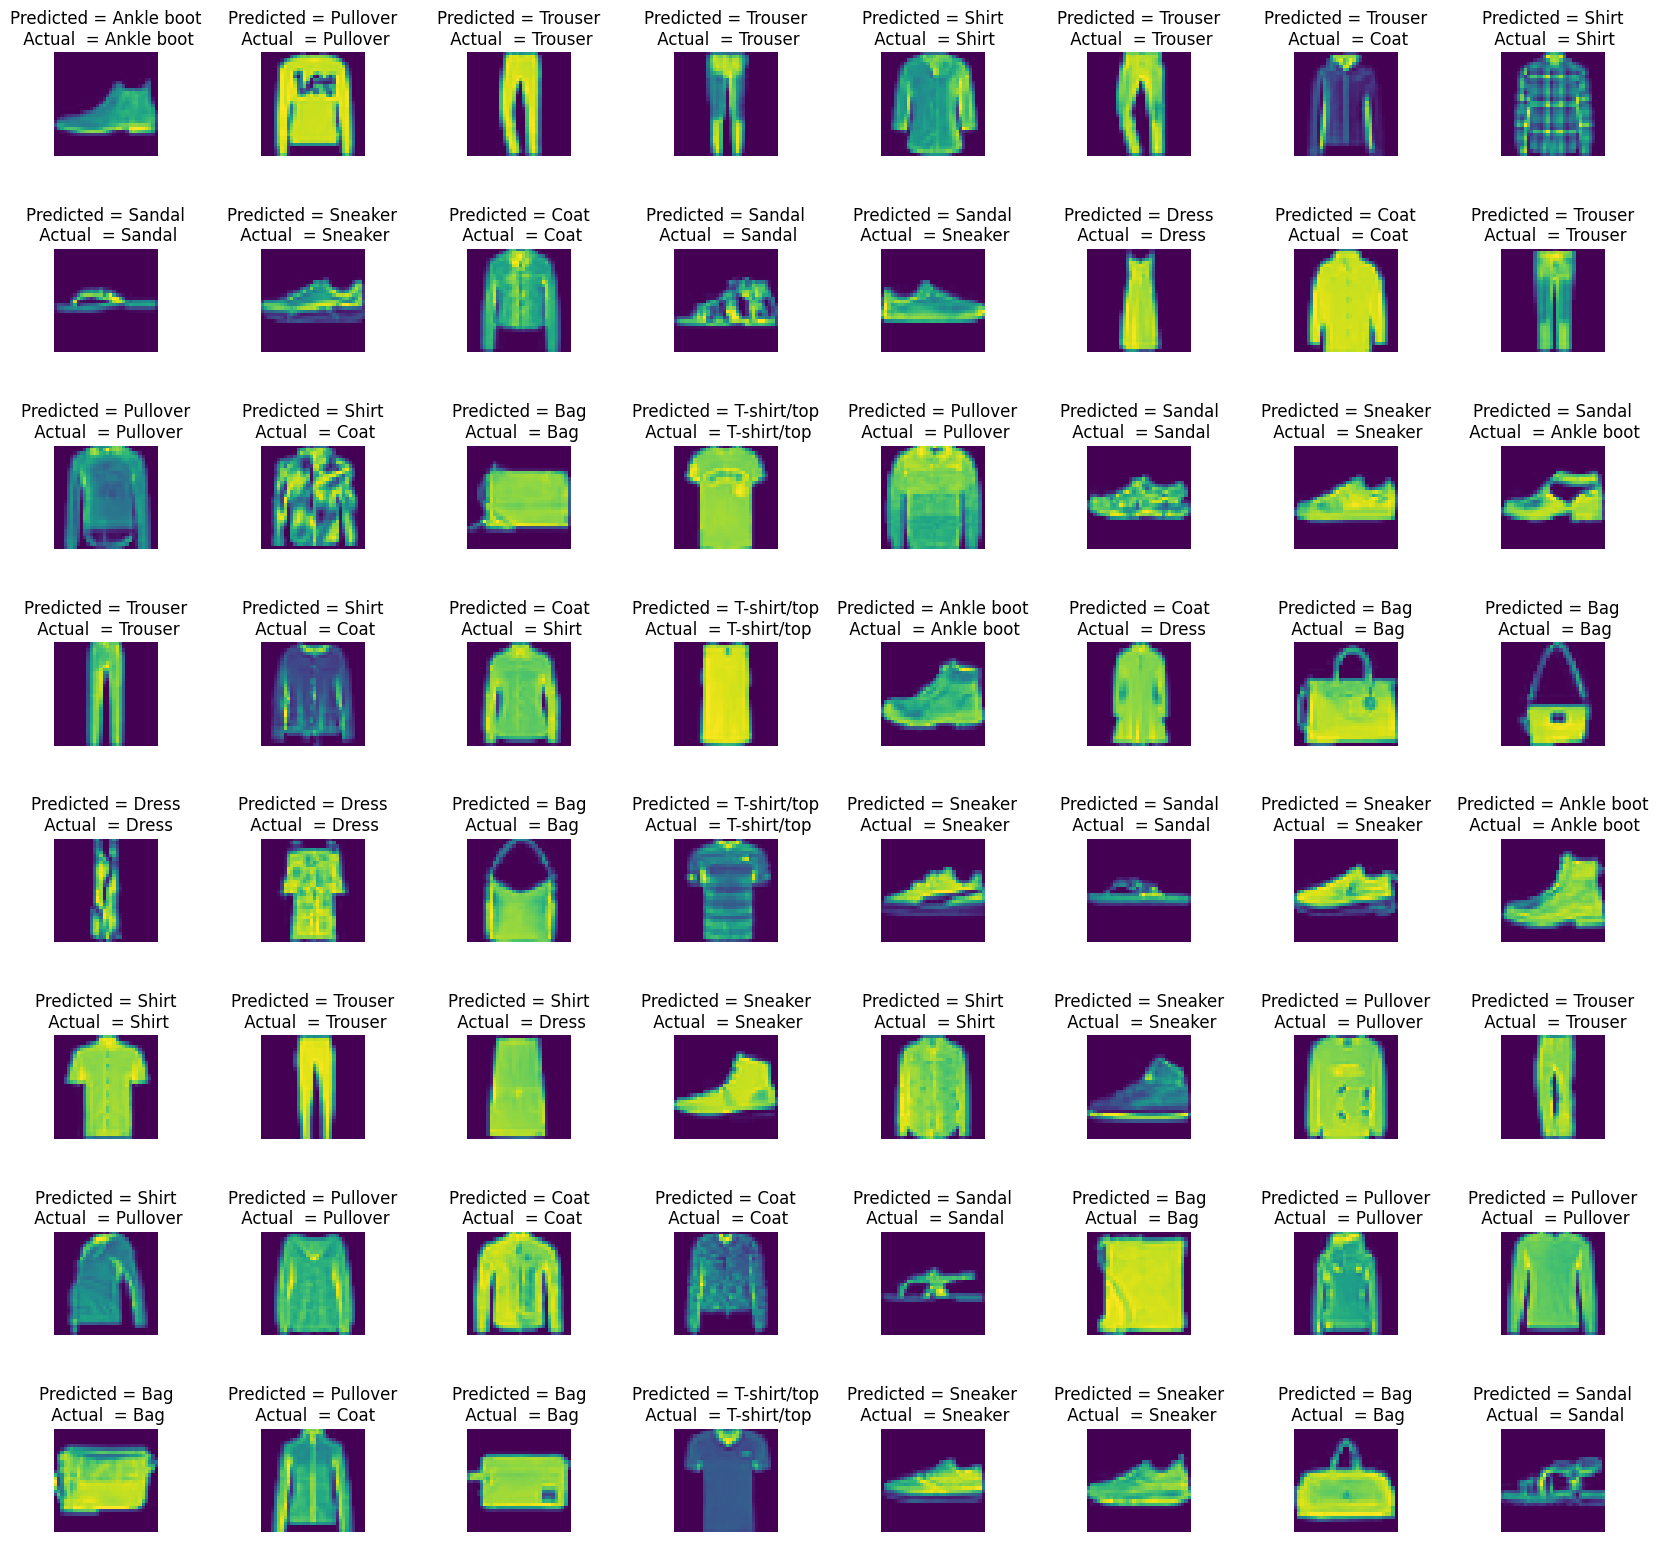

In [61]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions1[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

# **VGG16 with Fashion MNIST Dataset**

In [62]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from keras import optimizers
from matplotlib import pyplot as plt
import numpy as np


In [63]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.fashion_mnist.load_data()

x_train = np.expand_dims(x_train, axis=-1)
x_train = tf.image.resize(x_train, [32,32]) # if we want to resize 

x_test = np.expand_dims(x_test, axis=-1)
x_test = tf.image.resize(x_test, [32,32]) # if we want to resize 

In [64]:

num_classes = 10
optimizer = optimizers.Adam(learning_rate=0.0003)

In [65]:
# convert label to one-hot
one_hot_y_train = keras.utils.to_categorical(y_train,num_classes=num_classes)
one_hot_y_test = keras.utils.to_categorical(y_test,num_classes=num_classes)

(32, 32, 1)


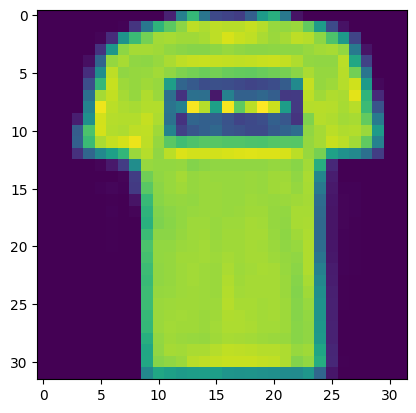

In [66]:
# check data
plt.imshow(x_train[1])
print(x_train[1].shape)

In [67]:
# build model(similar to VGG16, only change the input and output shape)
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(32,32,1),padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [68]:
# config optimizer,loss,metrics
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [69]:
# check model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        640       
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                  

In [71]:
# train
history=model.fit(x=x_train,y=one_hot_y_train,batch_size=128,epochs=10)

Epoch 1/10
469/469 [==============================] - 31s 66ms/step - loss: 0.3724 - accuracy: 0.8667
Epoch 2/10
469/469 [==============================] - 29s 61ms/step - loss: 0.2734 - accuracy: 0.9032
Epoch 3/10
469/469 [==============================] - 29s 61ms/step - loss: 0.2338 - accuracy: 0.9170
Epoch 4/10
469/469 [==============================] - 29s 62ms/step - loss: 0.2057 - accuracy: 0.9273
Epoch 5/10
469/469 [==============================] - 30s 64ms/step - loss: 0.1828 - accuracy: 0.9368
Epoch 6/10
469/469 [==============================] - 30s 64ms/step - loss: 0.1602 - accuracy: 0.9432
Epoch 7/10
469/469 [==============================] - 29s 61ms/step - loss: 0.1441 - accuracy: 0.9498
Epoch 8/10
469/469 [==============================] - 30s 63ms/step - loss: 0.1248 - accuracy: 0.9569
Epoch 9/10
469/469 [==============================] - 29s 61ms/step - loss: 0.1200 - accuracy: 0.9590
Epoch 10/10
469/469 [==============================] - 29s 61ms/step - loss: 0.097

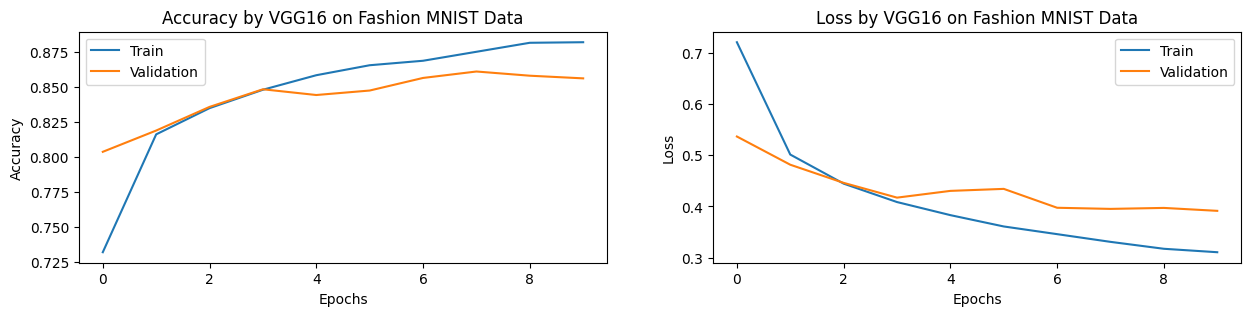

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(15, 3))
plt.subplot(1, 2, 1)
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Accuracy by VGG16 on Fashion MNIST Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss by VGG16 on Fashion MNIST Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

In [74]:
# evaluate
print(model.metrics_names)
model.evaluate(x=x_test,y=one_hot_y_test,batch_size=512)

['loss', 'accuracy']
20/20 [==============================] - 5s 128ms/step - loss: 0.3136 - accuracy: 0.9207


[0.3135530948638916, 0.9207000136375427]

1/1 [==============================] - 0s 477ms/step
predict class: 6
expected class: 9


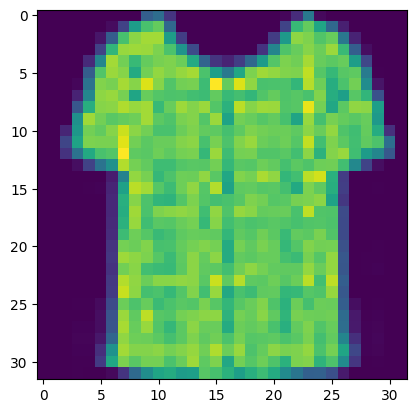

In [75]:
# predict
plt.imshow(x_test[1000])

result = model.predict(x_test[1000:1001]).tolist()
predict = 0
expect = y_test[0]
for i,_ in enumerate(result[0]):
    if result[0][i] > result[0][predict]:
        predict = i
print("predict class:",predict)
print("expected class:",expect)

313/313 [==============================] - 3s 8ms/step


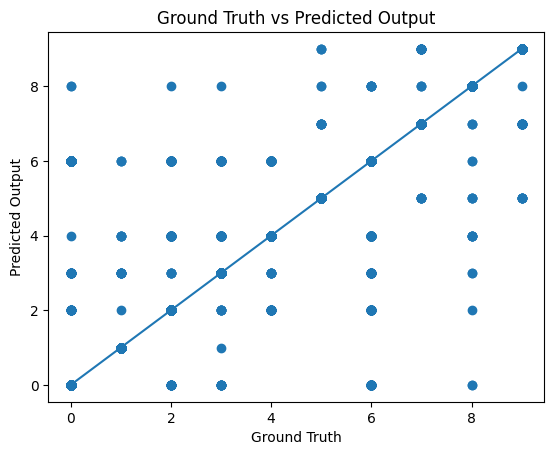

In [83]:
y_predictions = model.predict(x_test)
predicted_output=np.argmax(y_predictions,axis=1)
plt.scatter(y_test, predicted_output)
plt.plot(range(10), range(10))
plt.xlabel("Ground Truth")
plt.ylabel("Predicted Output")
plt.title("Ground Truth vs Predicted Output")

plt.show()

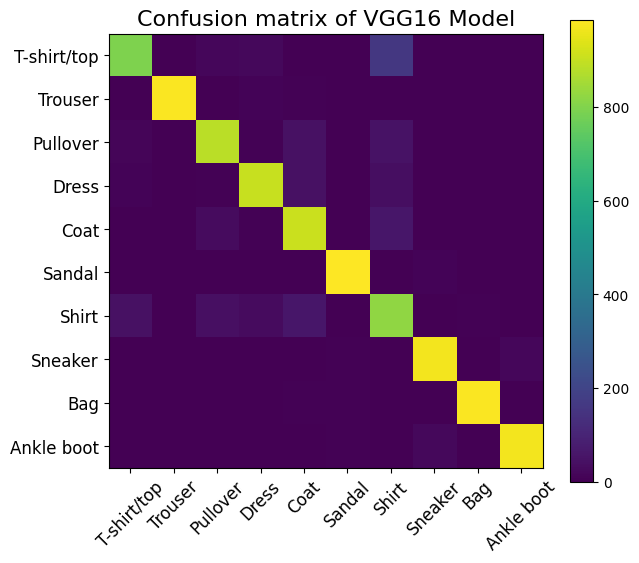

In [84]:
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix of VGG16 Model', fontsize=16)
plt.imshow(confusion_matrix(y_test, predicted_output))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [85]:
# save model
model.save("keras-VGG16-fashion_mnist.h5")

#**VGG19 with Fashion MNIST Dataset**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

%matplotlib inline

In [4]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.fashion_mnist.load_data()


In [5]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

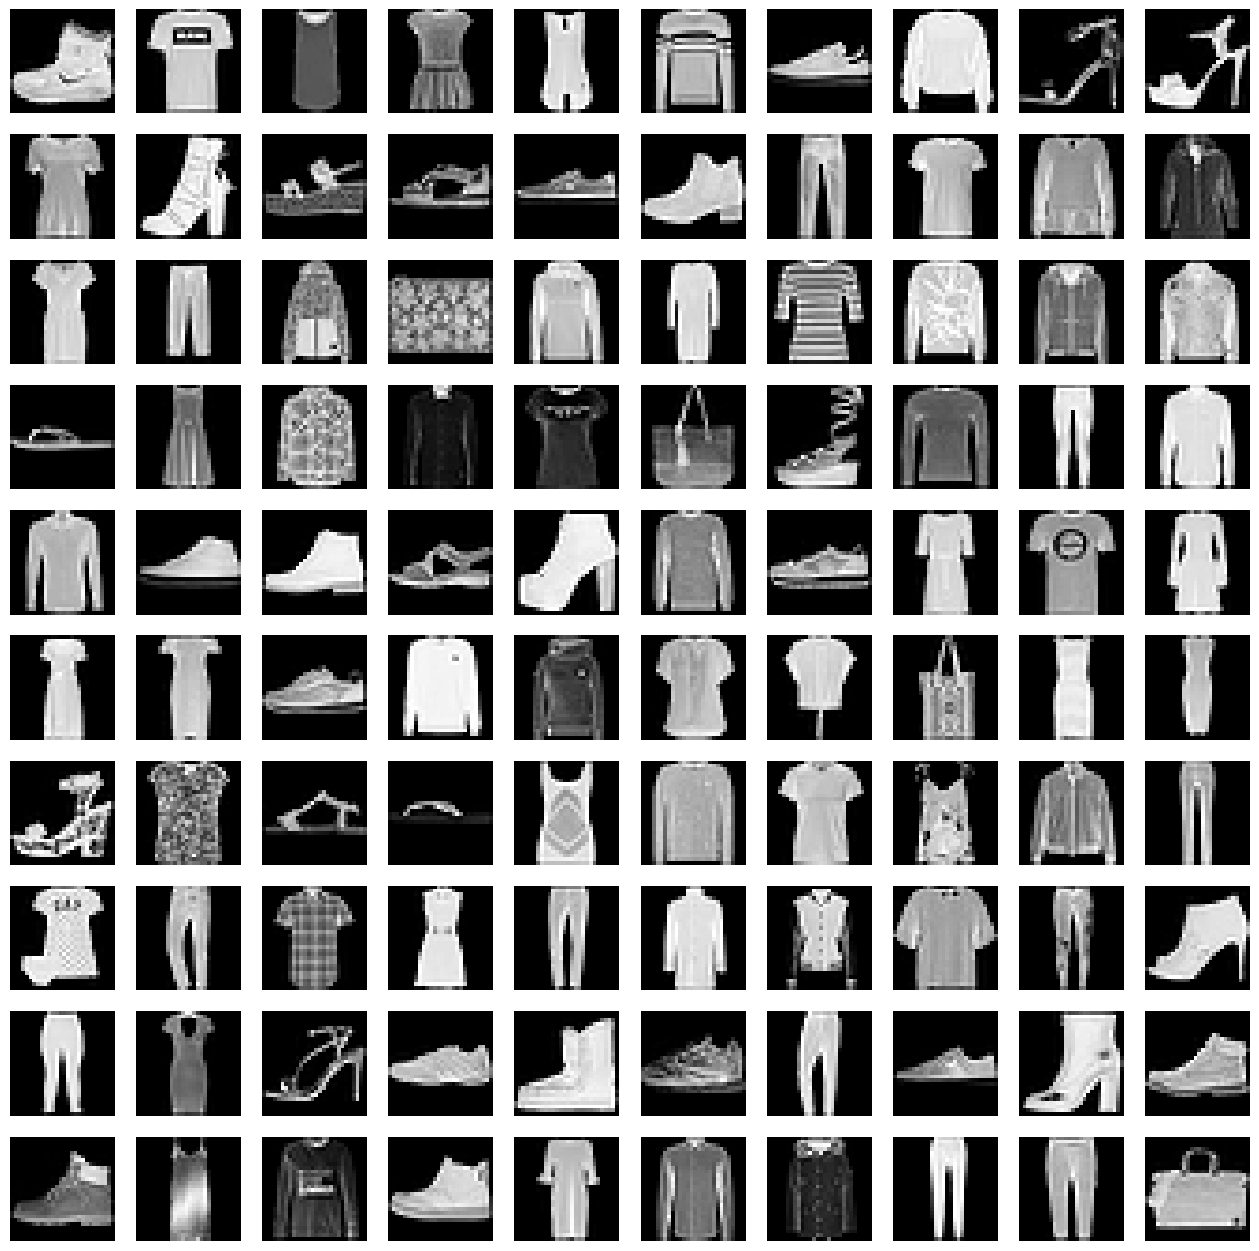

In [6]:
plt.figure(figsize = (16,16))
for i in range(100):
  plt.subplot(10,10,1+i)
  plt.axis('off')
  plt.imshow(x_train[i], cmap = 'gray')

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2)


In [7]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_val = to_categorical(y_val, num_classes = 10)

In [8]:
# Convert the images into 3 channels

x_train = np.expand_dims(x_train, axis=-1)
x_train = tf.image.resize(x_train, [64,64]) # if we want to resize 

x_test = np.expand_dims(x_test, axis=-1)
x_test = tf.image.resize(x_test, [64,64]) # if we want to resize 

x_val = np.expand_dims(x_val, axis=-1)
x_val = tf.image.resize(x_val, [64,64]) 

x_train=np.dstack([x_train] * 3)
x_test=np.dstack([x_test]*3)
x_val=np.dstack([x_val]*3)
x_train = x_train.reshape(-1, 64,64,3)
x_test= x_test.reshape (-1,64,64,3)
x_val= x_val.reshape (-1,64,64,3)


print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(48000, 64, 64, 3)
(48000, 10)
(12000, 64, 64, 3)
(12000, 10)
(10000, 64, 64, 3)
(10000,)


In [9]:


train_datagen = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.vgg19.preprocess_input,
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    horizontal_flip = True
)

train_datagen.fit(x_train)

val_datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg19.preprocess_input)
val_datagen.fit(x_val)

In [10]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [11]:
vgg_model = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=(64,64,3),
)

vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [12]:
model = tf.keras.Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 256)               262400    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 23,437,130
Trainable params: 23,437,130
No

In [13]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer= optimizer,
            loss='mse',
            metrics=['accuracy'])

In [14]:
history = model.fit(
    train_datagen.flow(x_train, y_train, batch_size = 128),
    validation_data = val_datagen.flow(x_val,y_val, batch_size = 128),
    epochs = 25,
    verbose = 1,
    callbacks = [learning_rate_reduction]
)

Epoch 1/25
375/375 [==============================] - 113s 253ms/step - loss: 0.0739 - accuracy: 0.3805 - val_loss: 0.0452 - val_accuracy: 0.6640 - lr: 0.0010
Epoch 2/25
375/375 [==============================] - 89s 237ms/step - loss: 0.0599 - accuracy: 0.5259 - val_loss: 0.0447 - val_accuracy: 0.6604 - lr: 0.0010
Epoch 3/25
375/375 [==============================] - 90s 239ms/step - loss: 0.0415 - accuracy: 0.6884 - val_loss: 0.0357 - val_accuracy: 0.7322 - lr: 0.0010
Epoch 4/25
375/375 [==============================] - 89s 237ms/step - loss: 0.0381 - accuracy: 0.7140 - val_loss: 0.0327 - val_accuracy: 0.7605 - lr: 0.0010
Epoch 5/25
375/375 [==============================] - 88s 235ms/step - loss: 0.0356 - accuracy: 0.7373 - val_loss: 0.0308 - val_accuracy: 0.7742 - lr: 0.0010
Epoch 6/25
375/375 [==============================] - 89s 238ms/step - loss: 0.0334 - accuracy: 0.7532 - val_loss: 0.0303 - val_accuracy: 0.7779 - lr: 0.0010
Epoch 7/25
375/375 [==============================]

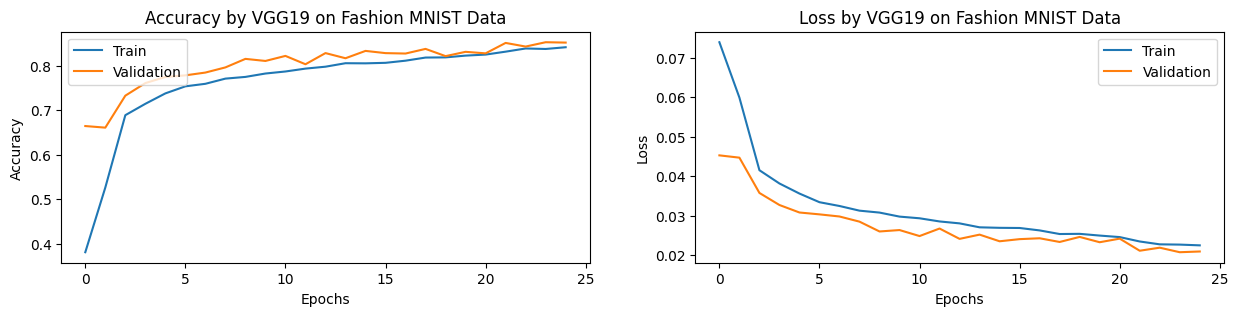

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 3))
plt.subplot(1, 2, 1)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy by VGG19 on Fashion MNIST Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss by VGG19 on Fashion MNIST Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

In [17]:
x_test = tf.keras.applications.vgg19.preprocess_input(x_test)
y_pred = model.predict(x_test)
predicted_output=np.argmax(y_pred,axis=1)


313/313 [==============================] - 7s 18ms/step


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Testing Accuarcy : ', accuracy_score(y_test, predicted_output))

Testing Accuarcy :  0.8469


In [19]:
cm = confusion_matrix(y_test, predicted_output)
cm

array([[834,   6,  21,  51,   9,   2,  55,   0,  19,   3],
       [  5, 961,   1,  21,   7,   1,   1,   0,   2,   1],
       [ 13,   3, 787,  13, 134,   2,  45,   0,   3,   0],
       [ 22,  10,   7, 870,  48,   4,  32,   0,   4,   3],
       [  1,   0, 128,  38, 785,   1,  40,   0,   4,   3],
       [  0,   1,   1,   0,   0, 933,   0,  54,   3,   8],
       [208,   1, 148,  37, 153,   0, 431,   0,  21,   1],
       [  0,   0,   0,   0,   0,  19,   0, 969,   0,  12],
       [  2,   1,   5,   6,   3,   6,   6,   1, 968,   2],
       [  1,   0,   0,   1,   0,   8,   1,  58,   0, 931]])

In [20]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


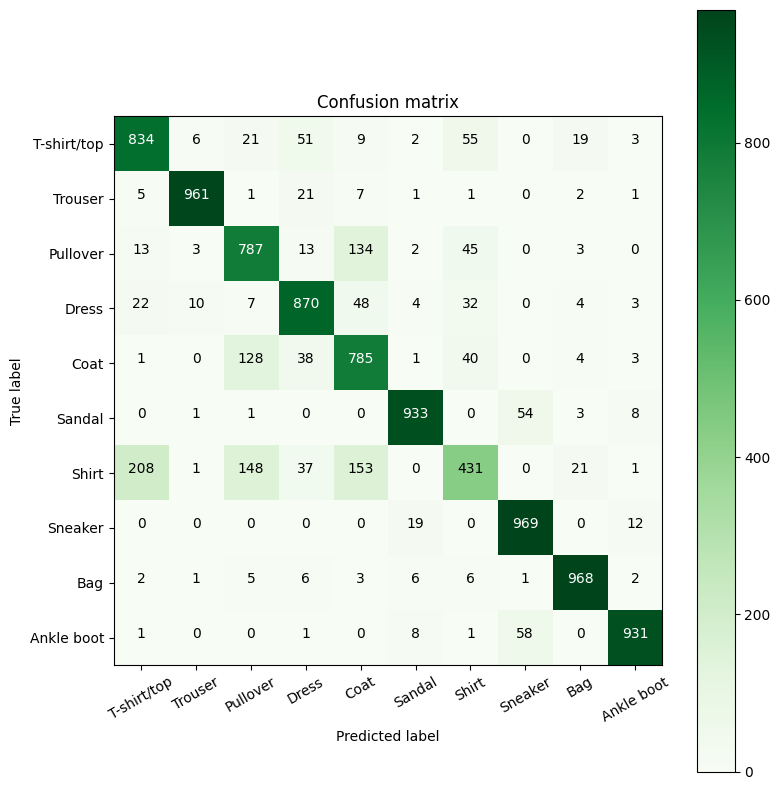

In [21]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm,classes)

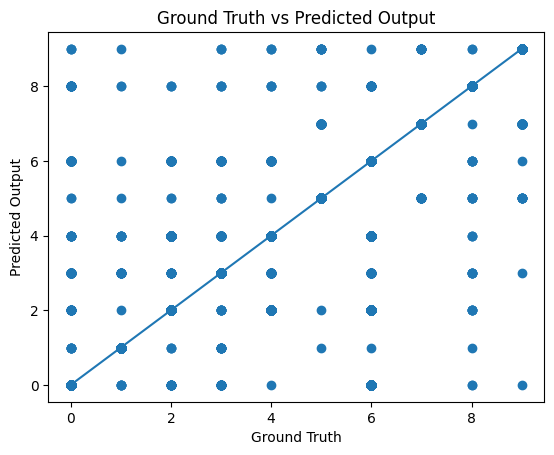

In [22]:

plt.scatter(y_test, predicted_output)
plt.plot(range(10), range(10))
plt.xlabel("Ground Truth")
plt.ylabel("Predicted Output")
plt.title("Ground Truth vs Predicted Output")

plt.show()